<a href="https://colab.research.google.com/github/DABURAcreate/BICT332Lab/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4 — Data Preprocessing Techniques (Colab Edition)



## 1. Handling Missing Data

### 1.1 Identifying Missing Values

**Run the code. How many missing values are in each column**

In [2]:
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
print("DataFrame with NaNs:")
display(df)
print("\nMissing count per column:")
print(df.isnull().sum())


DataFrame with NaNs:


,A,B,C,D
0,1.000,2.000,3.000,4.000
1,5.000,6.000,NaN,8.000
2,10.000,11.000,12.000,NaN



Missing count per column:
A    0
B    0
C    1
D    1
dtype: int64


**TASK: Modify df by introducing more NaNs & re-check counts.**

In [3]:
df2 = df.copy()
df2.loc[0,'A'] = np.nan
df2.loc[2,'B'] = np.nan
print("\nModified df2 with extra NaNs:")
display(df2)
print("\nMissing count per column (df2):")
print(df2.isnull().sum())


Modified df2 with extra NaNs:


,A,B,C,D
0,NaN,2.000,3.000,4.000
1,5.000,6.000,NaN,8.000
2,10.000,NaN,12.000,NaN



Missing count per column (df2):
A    1
B    1
C    1
D    1
dtype: int64


### 1.2 Eliminating Missing Values

In [ ]:
print("Drop rows with ANY NaNs:")
display(df.dropna(axis=0))
print("Drop columns with ANY NaNs:")
display(df.dropna(axis=1))
print("Drop rows where ALL are NaN (none here):")
display(df.dropna(how='all'))
print("Drop rows with FEWER than 4 non-NaN values:")
display(df.dropna(thresh=4))
print("Drop rows where column 'C' is NaN:")
display(df.dropna(subset=['C']))


**When do you drop rows vs. columns?**

If only a few records are missing & they don't bias the dataset.

If a feature is mostly missing or not useful.

### 1.3 Imputing Missing Values (scikit-learn `SimpleImputer`)

In [4]:
from sklearn.impute import SimpleImputer
import numpy as np

imr_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_mean = imr_mean.fit_transform(df.values)
print("Imputed (mean) ->\n", imputed_mean)


Imputed (mean) ->
 [[ 1.   2.   3.   4. ]
 [ 5.   6.   7.5  8. ]
 [10.  11.  12.   6. ]]


**Change strategy to 'median' or 'most_frequent'. Compare results.**

In [5]:
#Median
imr_median = SimpleImputer(strategy='median')
print("\nImputed (median) ->\n", imr_median.fit_transform(df.values))

#Most_frequent
imr_freq = SimpleImputer(strategy='most_frequent')
print("\nImputed (most_frequent) ->\n", imr_freq.fit_transform(df.values))


Imputed (median) ->
 [[ 1.   2.   3.   4. ]
 [ 5.   6.   7.5  8. ]
 [10.  11.  12.   6. ]]

Imputed (most_frequent) ->
 [[ 1.  2.  3.  4.]
 [ 5.  6.  3.  8.]
 [10. 11. 12.  4.]]


**Why might 'most_frequent' be useful for categorical data?**

Because categories are modes; the most common category is a sensible fill-in for missing labels.

## 2. Handling Categorical Data

### 2.1 Mapping Ordinal Features

In [7]:
import pandas as pd

df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red',   'L', 13.5, 'class1'],
    ['blue',  'XL', 15.3, 'class2'],
], columns=['color', 'size', 'price', 'classlabel'])

size_mapping = {'M': 1, 'L': 2, 'XL': 3}
df['size'] = df['size'].map(size_mapping)
print(df)

# Inverse mapping
inv_size_mapping = {v: k for k, v in size_mapping.items()}
print(df['size'].map(inv_size_mapping))

   color  size  price classlabel
0  green     1 10.100     class2
1    red     2 13.500     class1
2   blue     3 15.300     class2
0     M
1     L
2    XL
Name: size, dtype: object


**Add more sizes (e.g., 'S': 0). Update the DataFrame and mapping.**

In [8]:
size_mapping = {'S':0, 'M':1, 'L':2, 'XL':3}
df['size'] = df['size'].map(size_mapping)
print(df)

# Inverse mapping
inv_size_mapping = {v: k for k, v in size_mapping.items()}
print(df['size'].map(inv_size_mapping))

   color  size  price classlabel
0  green   NaN 10.100     class2
1    red   NaN 13.500     class1
2   blue   NaN 15.300     class2
0    NaN
1    NaN
2    NaN
Name: size, dtype: object


### 2.2 Encoding Class Labels

In [ ]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
print(y)
print(class_le.inverse_transform(y))


**Why encode labels as integers? Test with a classifier if not encoded.**

 Most scikit-learn estimators expect numeric targets; integers also bring ordering
 for some algorithms & efficient memory use.

### 2.3 One-Hot Encoding (Nominal Features)

In [12]:

X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
print(X)

# One-hot encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

ohe = OneHotEncoder()
print(ohe.fit_transform(X[:, [0]]).toarray())

# Pandas get_dummies
print(pd.get_dummies(df[['price', 'color', 'size']]))

# Drop first column to avoid multicollinearity
print(pd.get_dummies(df[['price', 'color', 'size']], drop_first=True))


[[1 nan 10.1]
 [2 nan 13.5]
 [0 nan 15.3]]
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
   price  size  color_blue  color_green  color_red
0 10.100   NaN       False         True      False
1 13.500   NaN       False        False       True
2 15.300   NaN        True        False      False
   price  size  color_green  color_red
0 10.100   NaN         True      False
1 13.500   NaN        False       True
2 15.300   NaN        False      False


**Apply one-hot encoding to the full DataFrame. Discuss multicollinearity and why dropping one column helps.**

In [14]:
# Make a copy of the full DataFrame
X = df.copy()
print("Original DataFrame:")
display(X)

#One-hot encode the full DataFrame
# Pandas version (simplest and handles all categorical columns directly)
X_ohe = pd.get_dummies(X, drop_first=False)
print("\nOne-hot encoded DataFrame (all categories, no drop):")
display(X_ohe)

# Drop first dummy to avoid multicollinearity
X_ohe_drop = pd.get_dummies(X, drop_first=True)
print("\nOne-hot encoded DataFrame (drop_first=True):")
display(X_ohe_drop)

Original DataFrame:


,color,size,price,classlabel
0,green,NaN,10.100,class2
1,red,NaN,13.500,class1
2,blue,NaN,15.300,class2



One-hot encoded DataFrame (all categories, no drop):


,size,price,color_blue,color_green,color_red,classlabel_class1,classlabel_class2
0,NaN,10.100,False,True,False,False,True
1,NaN,13.500,False,False,True,True,False
2,NaN,15.300,True,False,False,False,True



One-hot encoded DataFrame (drop_first=True):


,size,price,color_green,color_red,classlabel_class2
0,NaN,10.100,True,False,True
1,NaN,13.500,False,True,False
2,NaN,15.300,False,False,True


**Discuss multicollinearity and why dropping one column helps.**

Multicollinearity happens because one dummy variable is redundant:
if you know the values of all dummy columns except one, you can infer the last.
Example: for 'color' with 3 categories, one-hot encoding gives 3 columns.
But the sum of those 3 columns is always 1 → perfect linear dependency.
This can confuse regression models.
Solution: drop one dummy column (drop_first=True), which keeps the same info but removes redundancy.


## 3. Partitioning a Dataset (Wine)

In [15]:
df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
    header=None
)
df_wine.columns = [
    'Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
    'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
    'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'
]
print(df_wine.head())

from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

   Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1   14.230       1.710 2.430             15.600        127   
1            1   13.200       1.780 2.140             11.200        100   
2            1   13.160       2.360 2.670             18.600        101   
3            1   14.370       1.950 2.500             16.800        113   
4            1   13.240       2.590 2.870             21.000        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0          2.800       3.060                 0.280            2.290   
1          2.650       2.760                 0.260            1.280   
2          2.800       3.240                 0.300            2.810   
3          3.850       3.490                 0.240            2.180   
4          2.800       2.690                 0.390            1.820   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0            5.640 1.040                         3.920  

Change test_size to 0.2. Check class proportions in y_train and y_test.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

print("Shapes -> train:", X_train.shape, " test:", X_test.shape)

# ✅ Inspect class proportions
print("\nClass proportions in training set:")
print(pd.Series(y_train).value_counts(normalize=True))

print("\nClass proportions in test set:")
print(pd.Series(y_test).value_counts(normalize=True))

Shapes -> train: (142, 13)  test: (36, 13)

Class proportions in training set:
2   0.401
1   0.331
3   0.268
Name: proportion, dtype: float64

Class proportions in test set:
2   0.389
1   0.333
3   0.278
Name: proportion, dtype: float64


**Why use stratify=y?**

stratify=y ensures that the class distribution is preserved in both training and test sets.
Without stratify, some classes might be under- or over-represented in the test set,
which can bias performance evaluation.

## 4. Feature Scaling

### 4.1 Normalization (Min-Max Scaling)

In [18]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
print(X_train_norm[:2])  # First two rows


[[0.126 0.03  0.652 0.381 0.296 0.421 0.395 0.17  0.611 0.116 0.33  0.663
  0.173]
 [0.792 0.146 0.513 0.32  0.309 0.421 0.441 0.245 0.364 0.29  0.734 0.568
  0.715]]


**Plot histograms of a feature before/after scaling**

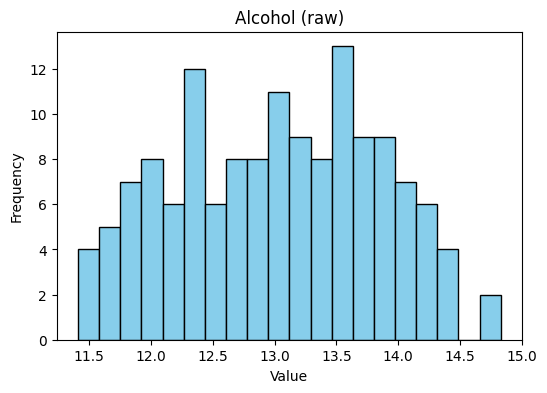

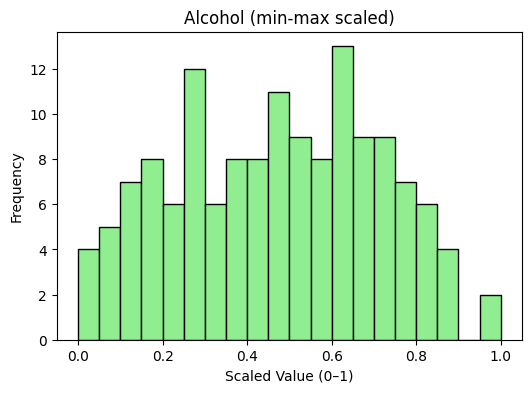

In [20]:
import matplotlib.pyplot as plt

# ✅ Plot histograms of a feature before/after scaling
feat_idx = 0  # Example feature: Alcohol

plt.figure(figsize=(6,4))
plt.hist(X_train[:, feat_idx], bins=20, color="skyblue", edgecolor="black")
plt.title("Alcohol (raw)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,4))
plt.hist(X_train_norm[:, feat_idx], bins=20, color="lightgreen", edgecolor="black")
plt.title("Alcohol (min-max scaled)")
plt.xlabel("Scaled Value (0–1)")
plt.ylabel("Frequency")
plt.show()


### 4.2 Standardization

In [21]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
print(X_train_std[:2])

[[-1.451 -1.28   0.743 -0.491 -0.371 -0.156  0.18  -1.208  1.292 -0.845
  -0.749  0.667 -0.712]
 [ 1.347 -0.758 -0.212 -0.843 -0.297 -0.156  0.398 -0.876 -0.049 -0.007
   0.997  0.295  1.632]]


**Compare mean and std of scaled features (should be ~0 and ~1).**



In [22]:
# ✅ Compare means and stds of training set (should be ~0 mean, ~1 std)
means = X_train_std.mean(axis=0)
stds  = X_train_std.std(axis=0, ddof=0)

print("Train means (first 5 features):", means[:5])
print("Train stds  (first 5 features):", stds[:5])

Train means (first 5 features): [-0. -0. -0.  0. -0.]
Train stds  (first 5 features): [1. 1. 1. 1. 1.]


**When is standardization preferred over normalization?**

 - After standardization, each feature has mean ≈ 0 and standard deviation ≈ 1.
 - Standardization is often preferred for algorithms that assume normally distributed
   data or are sensitive to feature scaling:
     • Logistic Regression
     • Support Vector Machines (SVM)
     • Linear Regression
     • PCA (Principal Component Analysis)
 - Normalization (min-max scaling) is better when:
     • Features need to be bounded (e.g., [0,1] for image pixels, neural nets).

## 5. Selecting Meaningful Features

### 5.1 L1 Regularization for Sparsity

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)

print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))
print(lr.coef_)


Training accuracy: 1.0
Test accuracy: 1.0
[[ 1.285  0.174  0.762 -1.26   0.     0.     1.22   0.     0.     0.
   0.     0.6    2.597]
 [-1.53  -0.486 -1.09   0.582  0.     0.     0.569  0.073  0.085 -2.121
   1.008  0.    -2.321]
 [ 0.161  0.14   0.543  0.     0.     0.    -2.44   0.     0.     1.804
  -1.065 -0.465  0.   ]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


**Vary C (e.g., 0.1, 10). Observe sparsity in coefficients.**

In [26]:
lr = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)

print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))
print(lr.coef_)

Training accuracy: 0.9859154929577465
Test accuracy: 0.9722222222222222
[[ 0.27   0.     0.    -0.02   0.     0.     0.631  0.     0.     0.
   0.     0.     1.569]
 [-0.876 -0.032 -0.049  0.     0.     0.     0.     0.     0.    -0.835
   0.109  0.006 -0.448]
 [ 0.     0.021  0.     0.     0.     0.    -0.852  0.     0.     0.591
  -0.403 -0.387  0.   ]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


**Plot coefficients vs. C as in the chapter.**

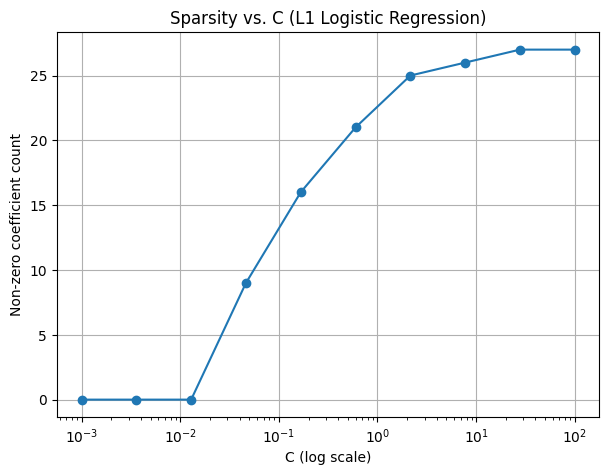

In [27]:
# ✅ Plot coefficient sparsity vs C
plt.figure(figsize=(7,5))
plt.plot(Cs, (coefs != 0).sum(axis=1), marker='o', linestyle='-')
plt.xscale("log")
plt.xlabel("C (log scale)")
plt.ylabel("Non-zero coefficient count")
plt.title("Sparsity vs. C (L1 Logistic Regression)")
plt.grid(True)
plt.show()

### 5.2 Sequential Backward Selection (SBS)

In [29]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])

        self.k_score_ = self.scores_[-1]
        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

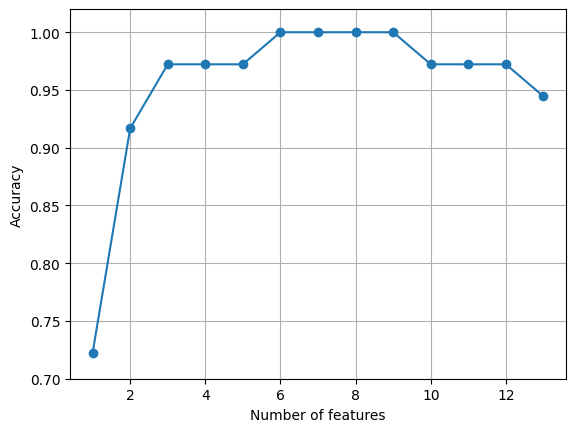

Index(['Alcohol', 'Flavanoids', 'Proanthocyanins'], dtype='object')
Test accuracy: 0.9166666666666666


In [30]:
# Paste SBS class here

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

# Selected features
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

# Performance with selected
knn.fit(X_train_std[:, k3], y_train)
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Change k_features or estimator. Analyze the plot.

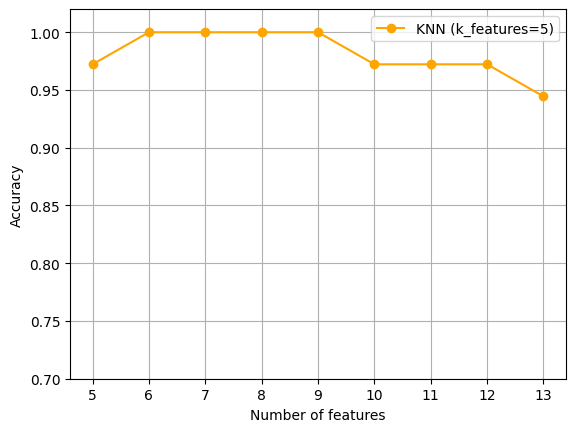

In [31]:
sbs_knn_k5 = SBS(knn, k_features=5)
sbs_knn_k5.fit(X_train_std, y_train)

k_feat_knn = [len(k) for k in sbs_knn_k5.subsets_]
plt.figure()
plt.plot(k_feat_knn, sbs_knn_k5.scores_, marker='o', color='orange', label='KNN (k_features=5)')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.legend()
plt.show()

### 5.3 Feature Importance with Random Forests

 1) Proline                        0.188217
 2) Flavanoids                     0.151884
 3) Color intensity                0.150182
 4) Alcohol                        0.137097
 5) OD280/OD315 of diluted wines   0.126218
 6) Hue                            0.062428
 7) Total phenols                  0.051911
 8) Malic acid                     0.031839
 9) Magnesium                      0.028725
10) Alcalinity of ash              0.025410
11) Proanthocyanins                0.018676
12) Ash                            0.014667
13) Nonflavanoid phenols           0.012745


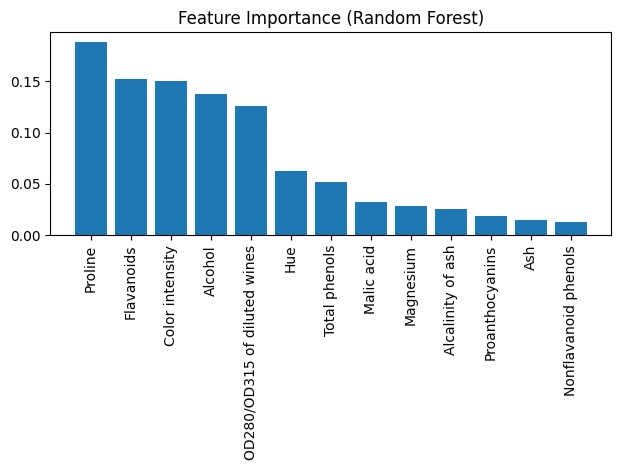

In [33]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print(f"{f+1:2d}) {feat_labels[indices[f]]:<30} {importances[indices[f]]:.6f}")

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

**Use SelectFromModel with threshold=0.1. Train a model on selected features.**

In [34]:
# SelectFromModel demo with threshold=0.1
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_train_sel = sfm.transform(X_train)
X_test_sel  = sfm.transform(X_test)
print("Selected feature count (threshold=0.1):", X_train_sel.shape[1])


# Train a simple model on selected features
clf_sel = LogisticRegression(max_iter=500, random_state=0)
clf_sel.fit(X_train_sel, y_train)
print("LogReg on selected features -> train acc:", clf_sel.score(X_train_sel, y_train),
      " test acc:", clf_sel.score(X_test_sel, y_test))

Selected feature count (threshold=0.1): 5


## 6. Conclusion & Reflection
1. Missing data can be dropped or imputed — choice depends on how much is missing and why.
2. Categoricals: use ordinal mapping for ordered categories (e.g., sizes), one-hot for nominal.
3. Splitting with stratify preserves label proportions.
4. Scaling matters for distance/gradient algorithms (KNN, SVM, Logistic Regression).
5. Feature selection: L1 encourages sparsity; SBS is wrapper-based; RF gives impurity-based importance.